---
着ない羽織があるなら持ってこい\
吹かない風があるなら持ってこい\
飛行しない雲があるなら持ってこい\
(夏井いつき)

**解析できないデータがあるなら持ってこい**

---

# Scikit-learnの俯瞰と一連の流れのおさらい
簡単な機械学習アプリケーションを通してScikit-learnの主要機能とモデルを確認する

ここでは、最も一般的なデータであるiris(アヤメ分類)を用い、最も基本的な手法(k-近傍法)で学習を行うことで、Scikit-learnについて俯瞰する

# アイリスのクラス分類
アヤメの種類を予測する\
そのために、種類が分かっているアイリスの測定値を用いて機械学習モデルを構築する

setosa, versicolor, virginicaの３種類に分類
（教師あり学習、クラス分類）

<img src = 'http://class.west.sd.keio.ac.jp/dataai/scilearn/iris_petal_sepal.png' width = "30%">

## irisデータの読み込み

必要なライブラリの読み込み

In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

irisデータセットの読み込み
（3種類のアイリスの花について、花弁の長さと幅、がくの長さと幅を測定した結果）

In [73]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

load_irisが返すirisオブジェクトは辞書型に似たオブジェクトで、キーと値を持つ

In [74]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

キー DESCR の値はデータセットの簡単な説明（description）

In [75]:
print(iris_dataset['DESCR'][:200] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...


キー target_names に対応する値は予測する花の種類

In [76]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


キー feature_names に対応する値は、それぞれの特徴量の説明

In [77]:
print('Feature names: {}'.format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


データ本体は、targetとdataフィールドに格納されている

dataには、がくの長さ、がくの幅、花弁の長さ、花弁の幅がNumpy配列として格納されている

In [78]:
type(iris_dataset['data'])

numpy.ndarray

配列dataの各行は個々の花、列は個々の花に対して行われた４つの測定に対応

In [79]:
iris_dataset['data'].shape

(150, 4)

配列には150の花の測定結果が格納されている\
最初の５つのサンプルを見る

In [80]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

配列targetには、測定された個々の花の種類がNumpy配列として格納されている

In [81]:
type(iris_dataset['target'])

numpy.ndarray

targetは1次元配列で、個々の花に1つのエントリが対応する

In [82]:
iris_dataset['target'].shape

(150,)

花の種類は0から2までの整数としてエンコードされている\
0：setosa, 1：versicolor, 2：virginica

In [83]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

訓練データとテストデータに分割する

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [85]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


scikit-learnでは、データを大文字のX、ラベルを小文字のyで表すのが一般的\
train_test_splitによって112の訓練データと38のテストデータに分割された

## データの観察

機械学習モデルを構築する前に、データを観察することが大切

**散布図**による可視化  
ここでは、全ての特徴量の組み合わせをプロットする**ペアプロット**を用いる

代表的なパラメータは次の通り
- c: マーカのcolor
- s: マーカのサイズ
- marker: マーカの形でデフォルトは'.'
- alpha: 図の点の透明度
- figsize: 図のサイズ
- grid: Trueでグリッドを表示
- hist_kwds: hist関数に渡され、ヒストグラムのbins（棒の数）を指定する

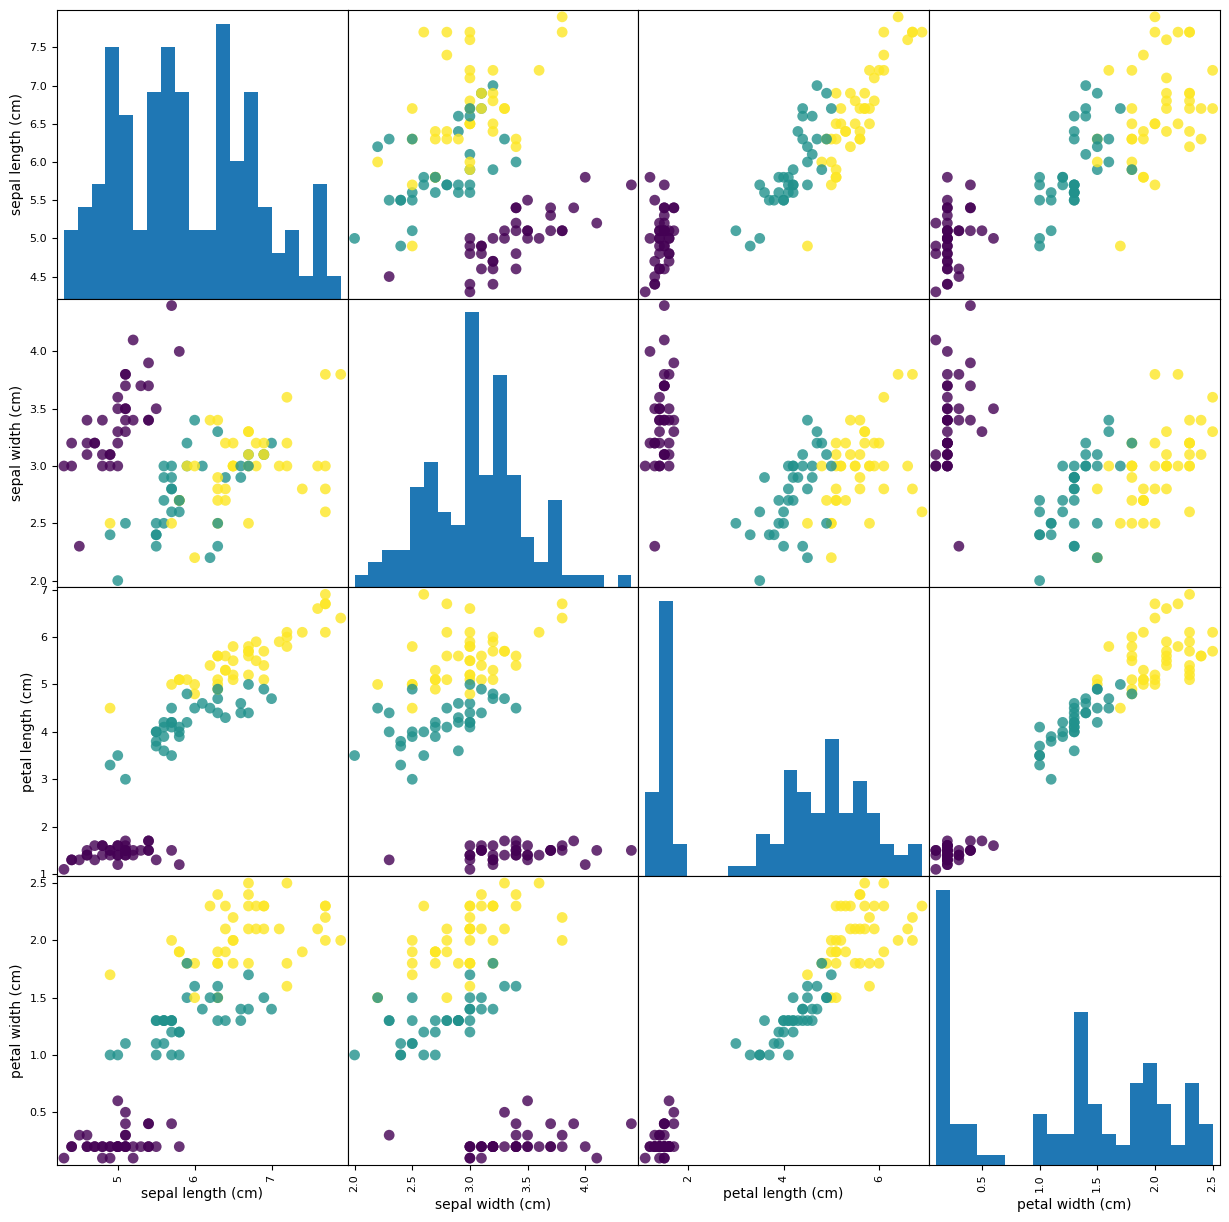

In [86]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

３つのクラスは花弁とがくの測定結果で分離していることが分かる
つまり、うまく分類できるように機械学習モデルを訓練することができる可能性が高いことを意味する

# k-近傍法

実際に機械学習モデルを構築してみる  
ここではk-近傍法(k-NearestNeighbors)によるクラス分類を行う

k-NNは、新しい点に最も近いk個の点を訓練セットから探し、これらの多数決で新しいデータのラベルを決定する方法である

その動作の仕組みを様々ビジュアライズしたサイトがあるので確認すると良い

<img src = 'http://class.west.sd.keio.ac.jp/dataai/scilearn/knn.png' width = "50%">

k-近傍法アルゴリズムはneighborsモジュールのkNeighborsClassifierクラスに実装されている\
モデルを使う前に、クラスのインスタンスを作成してオブジェクトを作る\
今回は k = 1とする  

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knnオブジェクトは、訓練データからモデルを構築する際に用いられるアルゴリズムと、新たなデータポイントに対する予測のためのアルゴリズムをカプセル化している\
訓練セットからモデルを構築するには、knnオブジェクトのfitメソッドを呼び出す

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 予測

構築したモデルを用いてラベルが分かっていない新たなデータの予測をしてみる\
がくの長さと幅、花弁の長さと幅をNumpy配列に格納し、knnオブジェクトのpredictメソッドを呼び出す

In [89]:
#新たなデータを格納
X_new = np.array([[5, 2.9, 1, 0.2]])  #sciklit-learnは常に2次元Numpy配列の入力を前提としているため
#予測を行う
prediction = knn.predict(X_new)
#結果を表示
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## モデル評価

先ほど作ったテストデータのそれぞれのアイリスに対して予測を行う

In [90]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

予測結果を正解のラベルと比較して精度を計算  
knnオブジェクトのscoreメソッドを用いる

In [91]:
knn.score(X_test, y_test)

0.9736842105263158

# サンプルデータセット
以下様々な機械学習アルゴリズムを紹介していくが、その際にいくつかのデータセットを用いるので、それらについて簡単に説明する

まず、2クラス分類データセットとして、forgeデータセットを、回帰分析としてwaveデータセットを合成する\
これらは、アルゴリズム的に機械合成されたデータである

またより現実的なデータとして、先ほど示したアイリスの他、ウィスコンシン乳癌データ、ボストン住宅データを利用する

In [92]:
!pip install mglearn
import mglearn

make_forgeによりデータを合成する

X.shape:(26, 2)


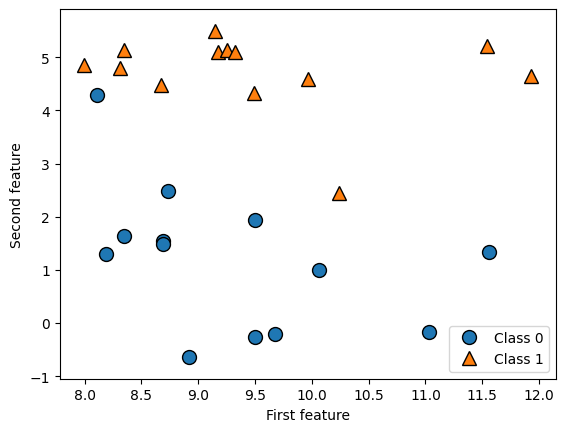

In [93]:
# データセットの生成
X, y = mglearn.datasets.make_forge()
# プロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:{}'.format(X.shape))

回帰アルゴリズムでは、waveデータセットを合成して用いる

Text(0, 0.5, 'Target')

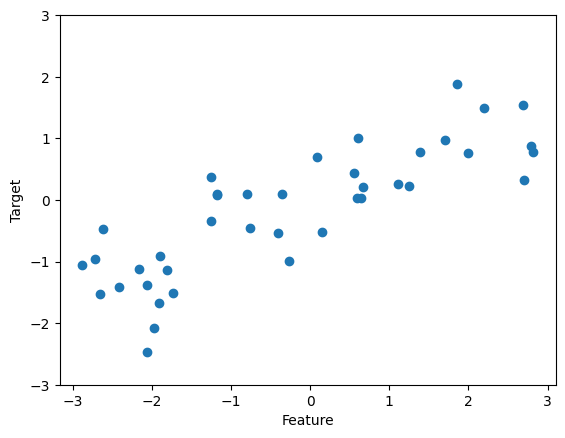

In [94]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

これらの小さい合成データセットの他に、scikit-learnに含まれている2つの実問題から取ったデータセットを用いる

１つ目は、ウィスコンシン乳癌データセットで、癌の腫瘍に良性(benign)か悪性(malignant)かのラベルがつけられている

In [95]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
print("Shape of cancer data:", cancer.data.shape)
print("Sample counts per class:", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Shape of cancer data: (569, 30)
Sample counts per class: {'malignant': 212, 'benign': 357}


30の特徴量を持つ569のデータポイントで構成される
- そのうち212が悪性、357が良性

２つ目は、お馴染みboston housingデータセットである

すでに述べた通り、倫理上の問題がありscikit-learnからは

13の特徴量を持つデータであるが、これらの積も特徴量として考える（特徴量エンジニアリング）

In [97]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

# 教師あり学習

## 教師あり学習について

- クラス分類　…クラスラベルを予測
 - ２クラス分類
 - 多クラス分類
- 回帰　…連続値を予測

## k-近傍法
k-近傍法は最も単純な学習アルゴリズムと言われる\
forgeデータセットに対するクラス分類の例を示す

k = 1 の場合の例

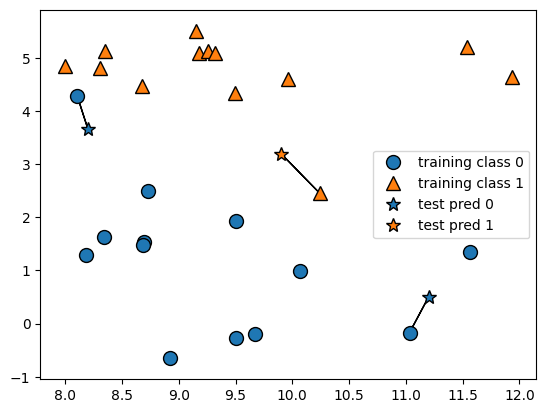

In [98]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

k = 3 の場合の例

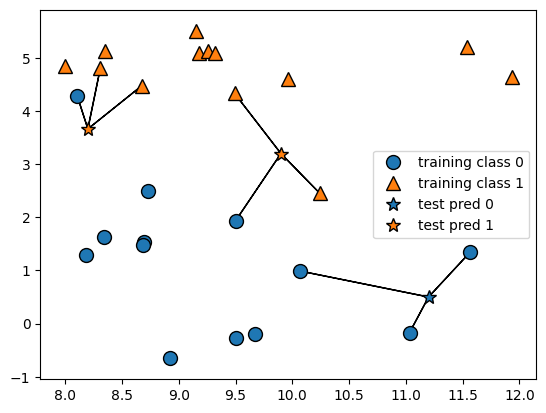

In [99]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

**例題**：forgeデータを訓練セットとテストセットに分割し、k-近傍法アルゴリズムを適用してモデルの汎化性能（精度）を評価せよ\
random_state = 0, k = 3

In [100]:
# 解
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


kの値を変化させる\
多くの近傍点を考慮するほど複雑度が低いモデルに対応する

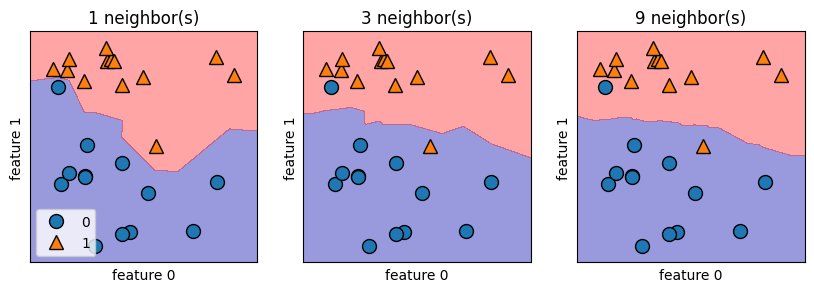

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## 線形回帰

既に学習済みなので、シンプルに済ませる

w[0]: 0.393906  b: -0.031804


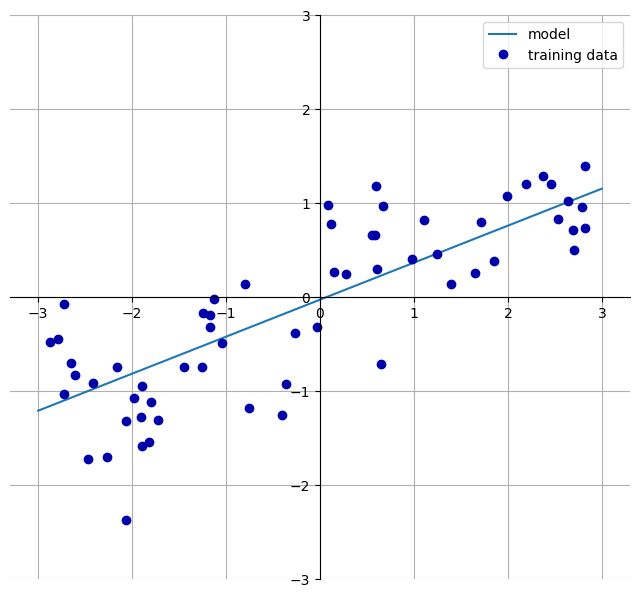

In [102]:
mglearn.plots.plot_linear_regression_wave()

In [103]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# モデルを適用
lr = LinearRegression().fit(X_train, y_train)

# 傾きを表すパラメータである重み（係数）はcoef_属性、切片はintercept_属性に格納
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [104]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


精度はよくないが、訓練データとテストデータに対する値が非常に近いことから、過剰適合ではなく適合不足であると考えられる
- つまり、この問題のモデルとしては線形回帰は適していない、ということになる
このような1次元データセットでは過剰適合の危険は少ないが、高次元になる（データセットが多くの特徴量を持つ）と過剰適合の可能性が高まる

次に、より複雑なデータセットに対する挙動を見てみる

**例題**: boston_housingのデータセットを読み込み、訓練セットとテストセットに分割し、線形回帰モデルを作り、汎化性能を評価せよ

In [105]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


このように、訓練セットとテストセットで性能が大きく異なるのは、過剰適合が起きている証拠である\
モデルの複雑度を制御できる線形回帰として、リッジ回帰やLassoがあるが、ここでは特に触れない

## 決定木

決定木はクラス分類や回帰タスクに広く用いられているモデルである

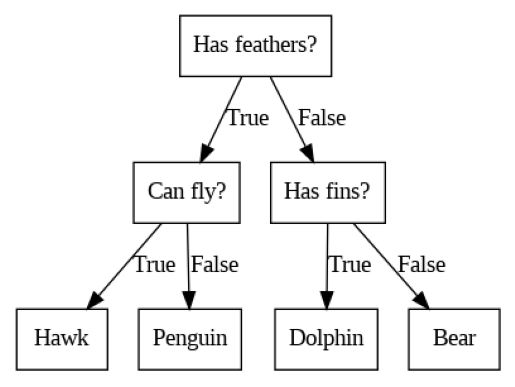

In [106]:
mglearn.plots.plot_animal_tree()

two_moonsデータセットを用いて決定木の構築過程を見る

決定木における学習とは、最も早く正解にたどり着けるような一連のYes/No型の質問の学習である  
- まず、目的変数に対して最も情報量が多い（＝よく分割する）テストを選択する
- ここでは、x[1] <= 0.0596 が選ばれた  

このプロセスを個々の領域に対して再帰的に繰り返すことで、２分木による決定木が得られる

データの再帰分割は，一つの領域に一つのクラス（または回帰値）しか含まれなくなるまで繰り返される(これは変更できる)

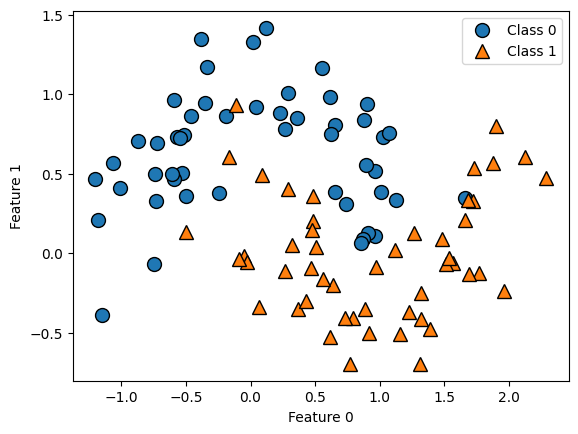

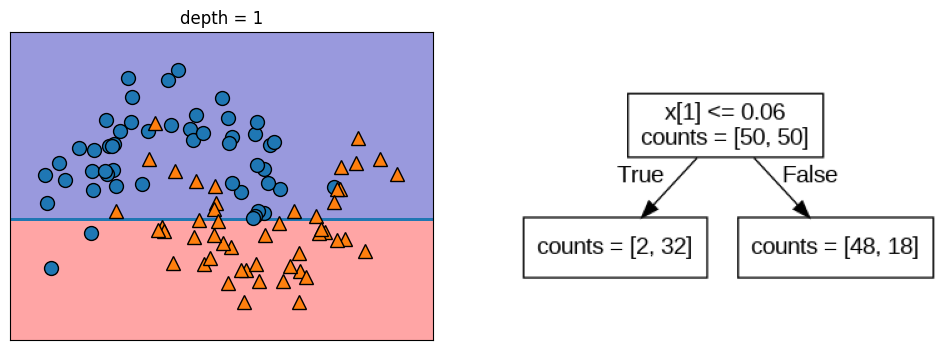

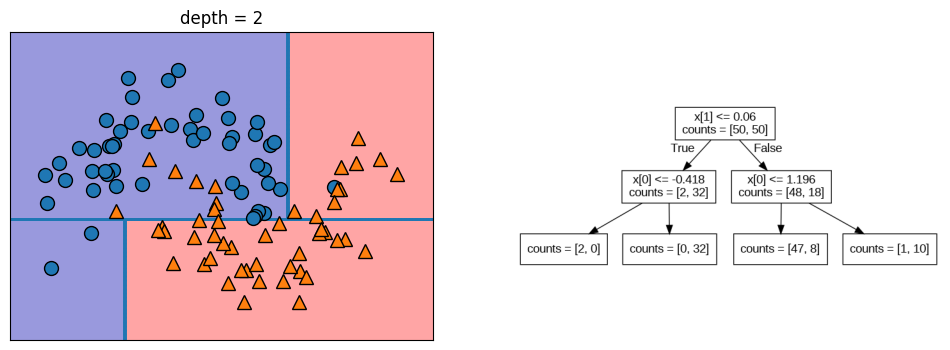

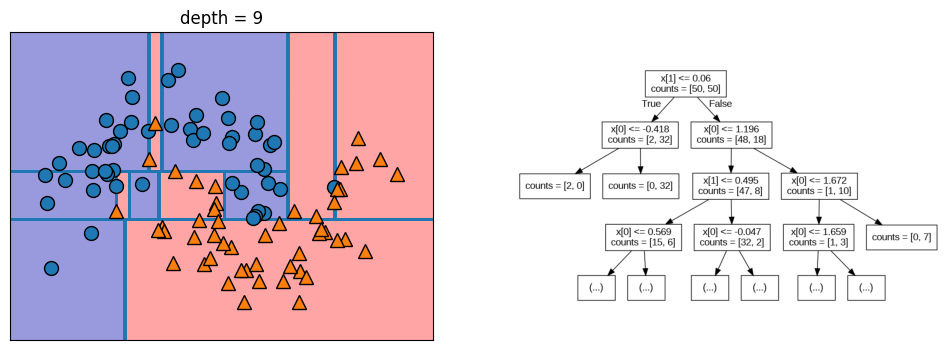

In [107]:
mglearn.plots.plot_tree_progressive()

cancerデータセットを用いて完全な木を構築してみる

In [108]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


訓練セットに対する精度は100％、テストセットに対する精度は94％程度となった
- 決定木の深さに制約を与えないと、決定木はいくらでも深く複雑になり、新しいデータに対する汎化性能が低くなる
- そこで、木が完全に訓練データに適合する前に木の成長を止めてみる
- ここでは max_depth = 4（質問の列は４つまでということ）とする

In [109]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## ランダムフォレスト

ランダムフォレストをtwo_moonsデータセットに適用してみる

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

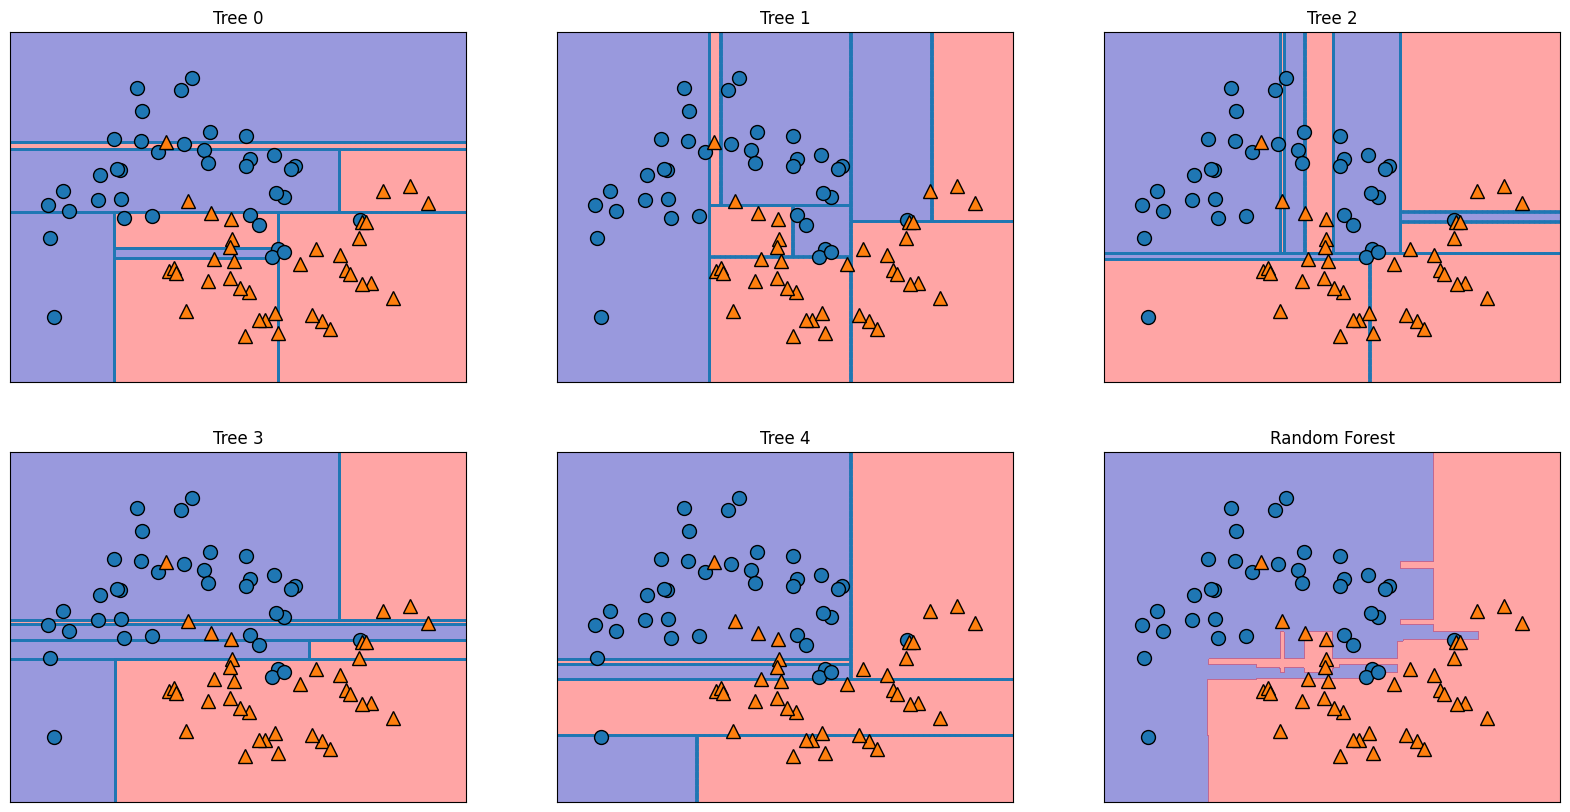

In [111]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('Tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

５つのランダム化された決定木による決定境界と、それらを平均して得られた決定境界を示す
- 個々のどの決定木よりも過剰適合が少なく，直観に合致した決定境界を描いている

**例題**: cancerデータセットに対して100個の決定木を用いたランダムフォレストを適用し、精度を確かめよ

In [112]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.9976525821596244, 0.9440559440559441)

## サポートベクタマシン(SVM)

線形SVMモデルをforgeデータセットに適用してみる

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


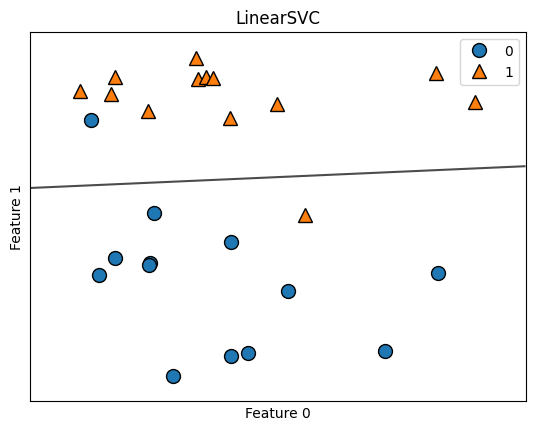

In [113]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
X, y = mglearn.datasets.make_forge()
clf = linear_svc.fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title(clf.__class__.__name__)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

SVCにおけるハイパーパラメータCを変えてみる

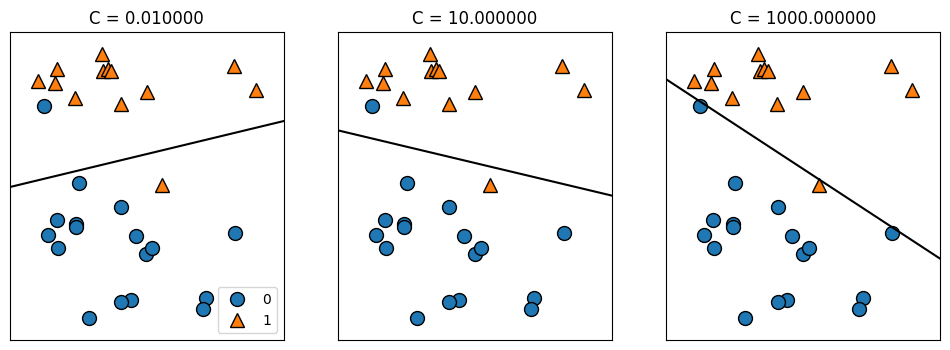

In [114]:
mglearn.plots.plot_linear_svc_regularization()

右側ほどすべての点を正しく分類することを重視するあまり、全体を捉えられていない\
おそらく過剰適合している

以下に示すように、線形分離が不可能な例も存在する

Text(0, 0.5, 'Feature 1')

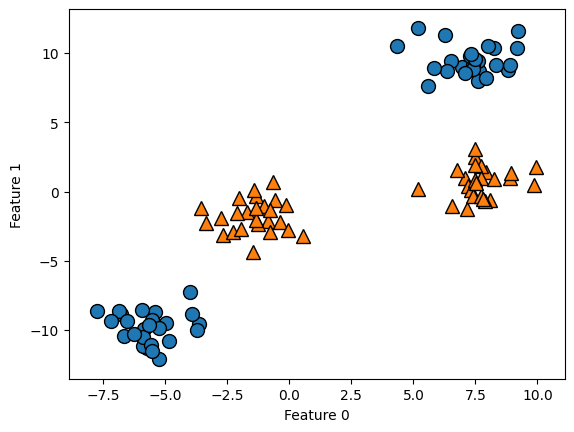

In [115]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

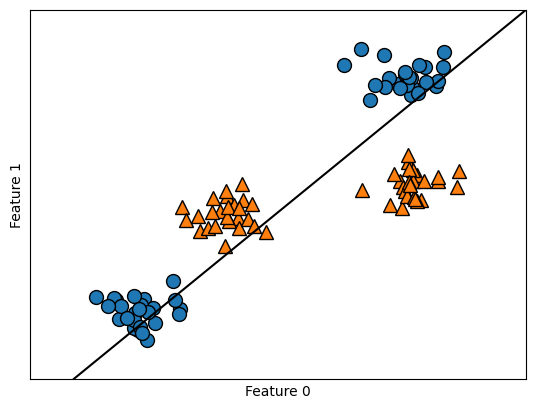

In [116]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

そこで、入力特徴量を拡張する\
例えば，２番目の特徴量の２乗を新たな特徴量とする

In [117]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

<ipython-input-117-4ec64c497f2a>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-117-4ec64c497f2a>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

この拡張されたデータセットに対して線形モデルを適用する

In [118]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-118-f09064a672d6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-118-f09064a672d6>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

これを元の空間で見ると、決定境界が直線から曲線になっていることが分かる

Text(0, 0.5, 'Feature 1')

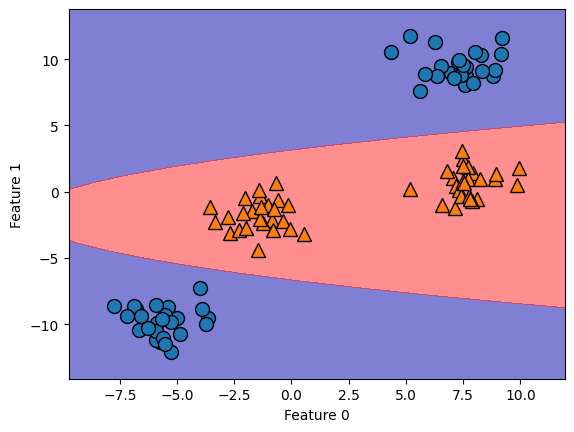

In [119]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

以上、カーネルトリックの効果を確認した

ここで、多項式カーネルやガウシアンカーネル(RBFカーネルとも呼ばれる)があることは述べたが、forgeデータセットに対してRBFカーネルを用いたSVMによる決定の様子を見てみる

Text(0, 0.5, 'Feature 1')

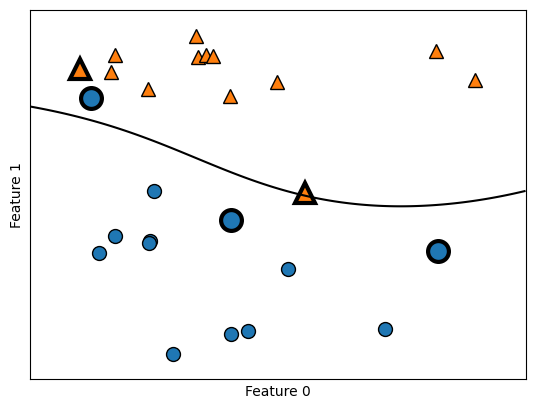

In [120]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

この場合、SVMによる境界は非常になめらかで非線形である\
ここでは、Cとgammaの2つのパラメータを調整している

gammaパラメータはガウシアンカーネルの幅を調整する（点が近いということを意味するスケールを決定する）\
Cパラメータは正規化パラメータで、個々のデータポイントの重要度を制限する\
これらを変化させる

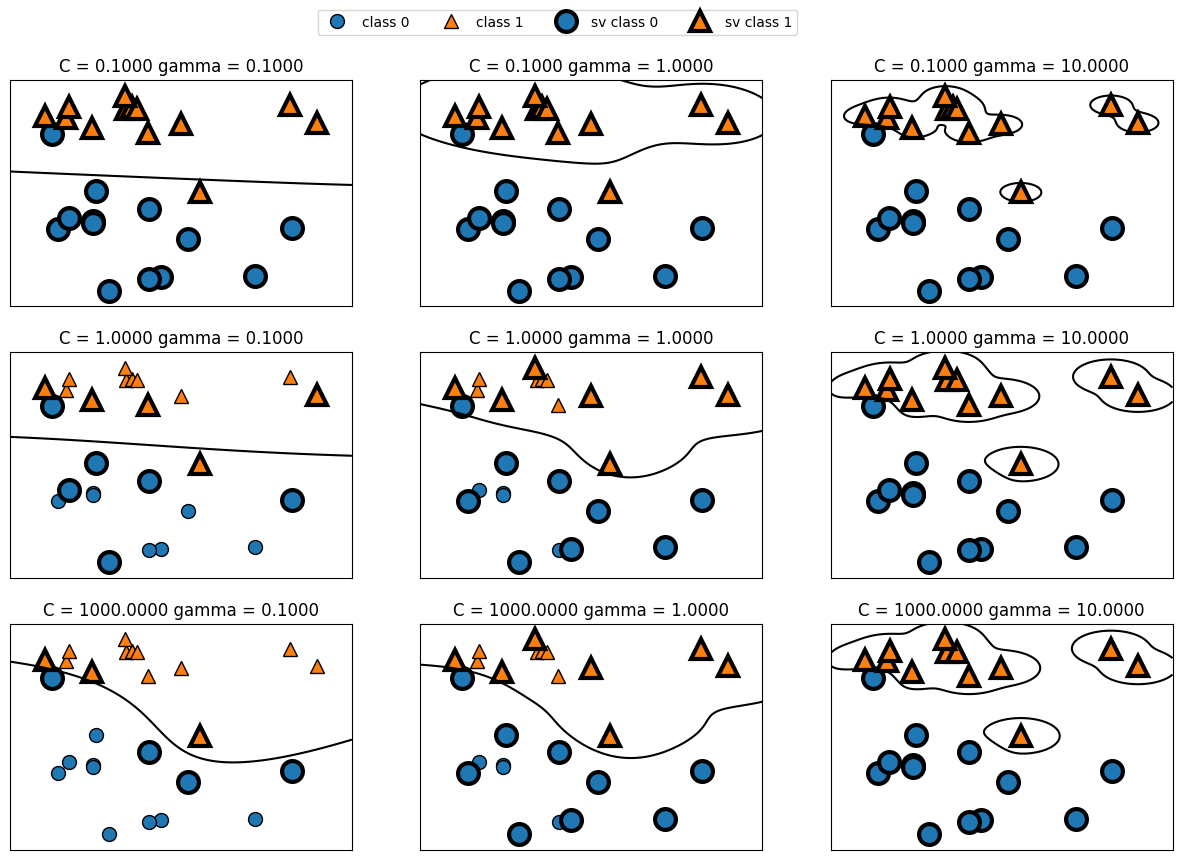

In [121]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

gammaが小さいとカーネルの直径が大きくなり、多くの点を近いと判断する\
Cを大きくすると、個々のデータポイントが決定境界に強い影響を与えるようになる

## ニューラルネットワーク

ニューラルネットワークが近年「ディープラーニング」という名前で注目を集めている\
ここでは、比較的簡単な多層パーセプトロン（Multilayer Perceptron：MLP）によるクラス分類についてのみ取り扱う

線形回帰では、入力特徴量の重み付き和によって予測を行っていた\
MLPでは、重み付けが繰り返し行われる\
中間処理ステップである隠れユニットの計算で重み付き和が行われ、この隠れユニットの値に対して重み付き和が行われて、最後の結果が算出される

two_moonsデータセットに対してMLPが動く様子を見てみる

Text(0, 0.5, 'Feature 1')

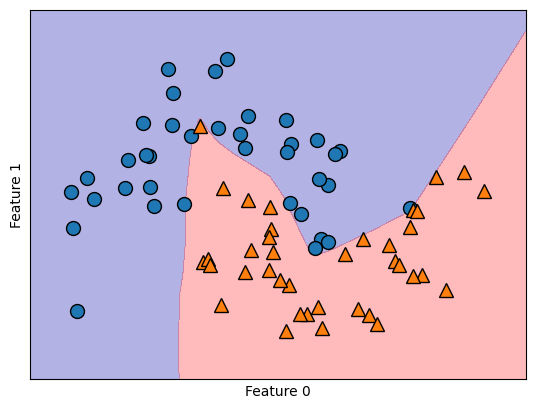

In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

これは、隠れユニットの数を100（デフォルト）としているが、この小さいデータセットに対しては大きすぎるため、隠れユニット数を10としてモデルの複雑さを減らす

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

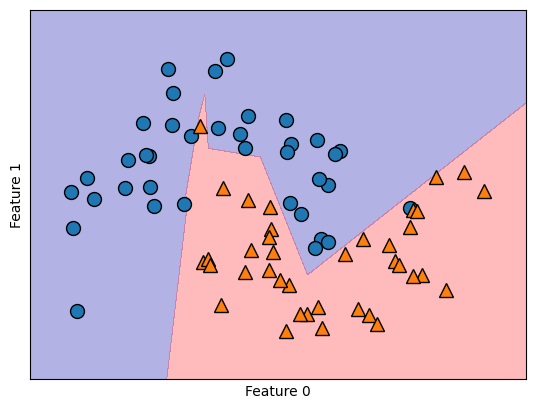

In [123]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

ニューラルネットワークの複雑さは、隠れ層の数、隠れ層のユニットの数、重みを0に近づける(正規化)などによって制御できる\
正規化の強さはパラメータalphaで決定される\
10ユニットもしくは100ユニットの2層の隠れ層を持つニューラルネットをtwo_moonsに適用した場合のパラメータalphaの効果を以下に示す

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


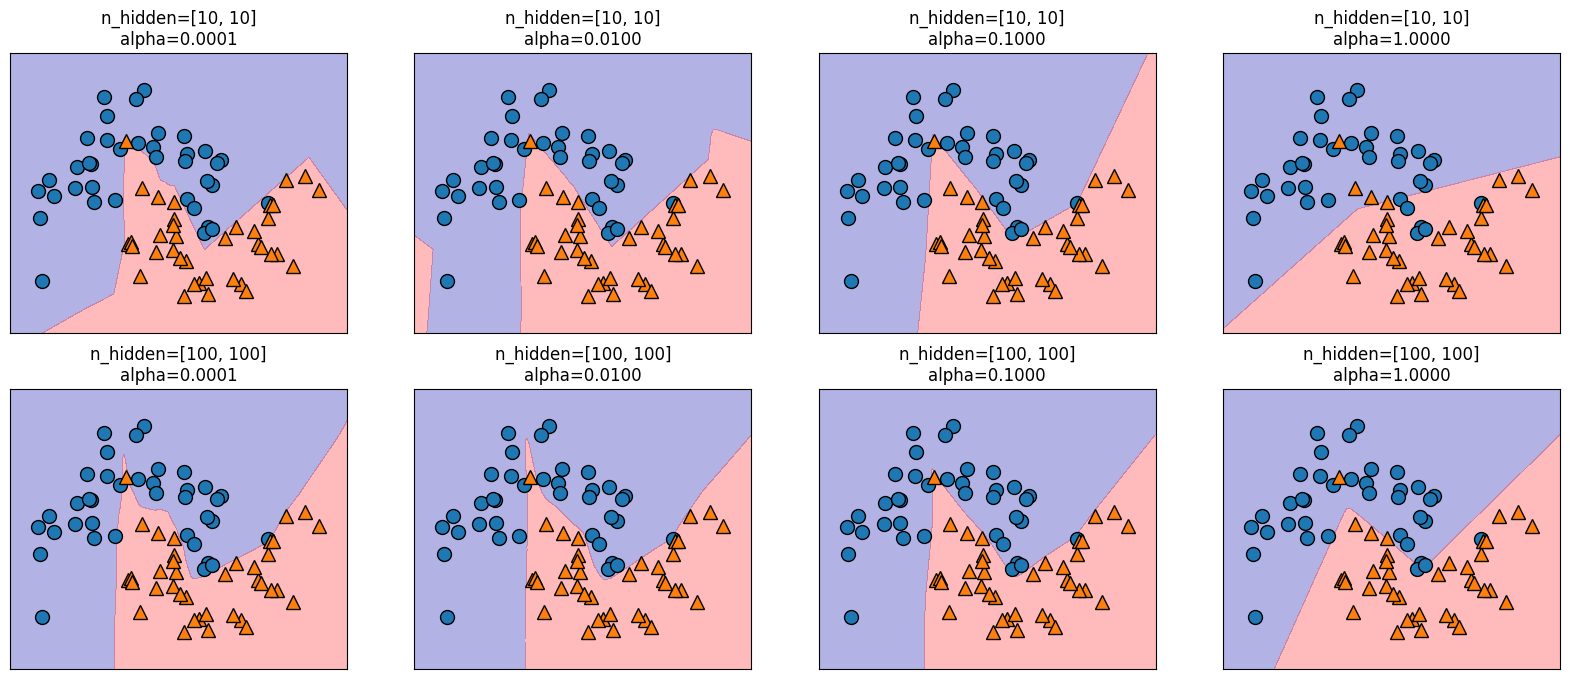

In [124]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

# 教師なし学習

## 教師なし学習の種類

- 教師なし変換
 - 次元削減
- クラスタリングアルゴリズム

## k-meansクラスタリング
最も単純なクラスタリングアルゴリズム  
- 個々のデータポイントを最寄りのクラスタ重心に割り当てる
- 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する

というステップを繰り返し、割り当てが変化しなくなったらアルゴリズムは終了する

合成データセットにこれを適用してみる

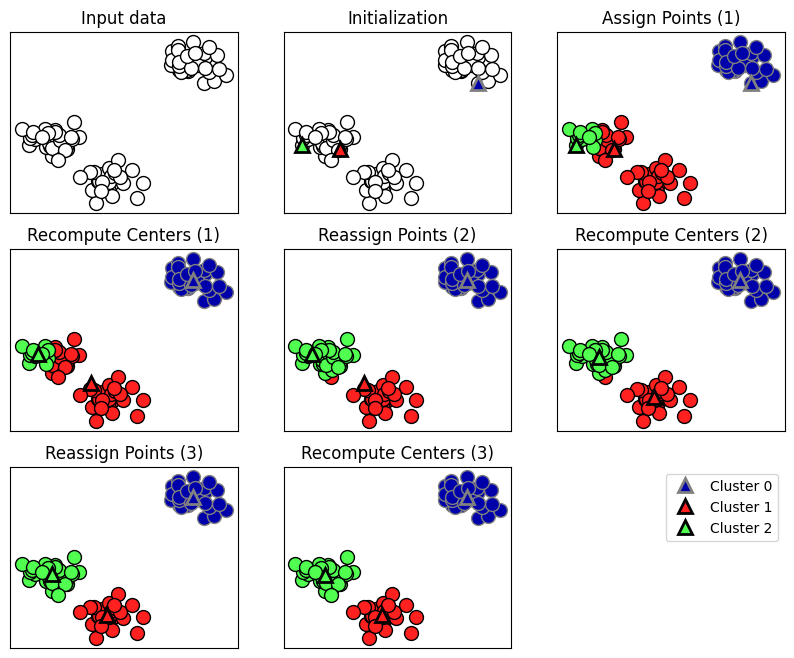

In [125]:
mglearn.plots.plot_kmeans_algorithm()

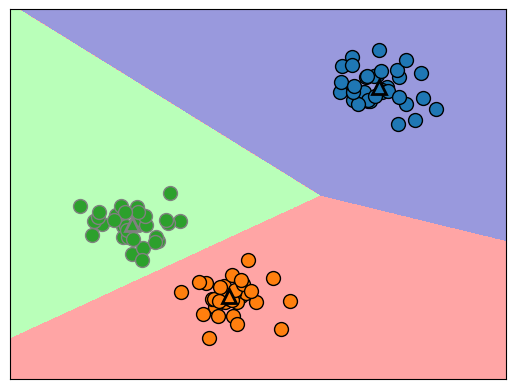

In [126]:
mglearn.plots.plot_kmeans_boundaries()

In [127]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

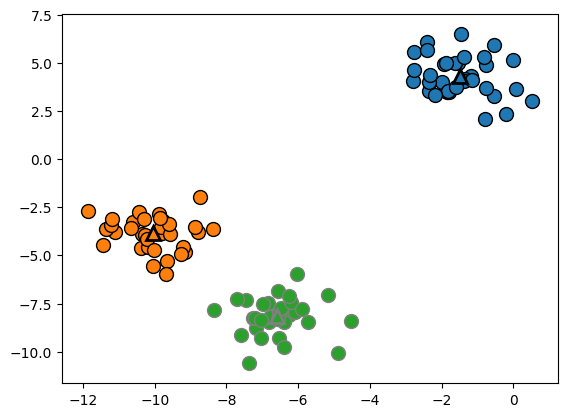

In [128]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


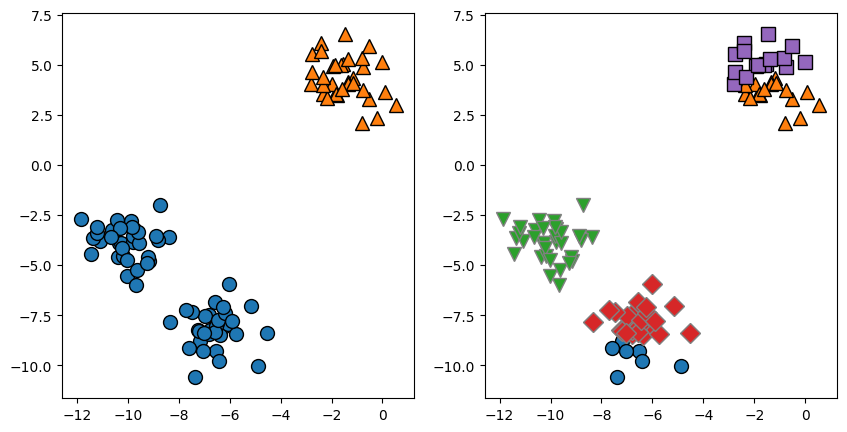

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

以下は上手くいかない例である

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 1')

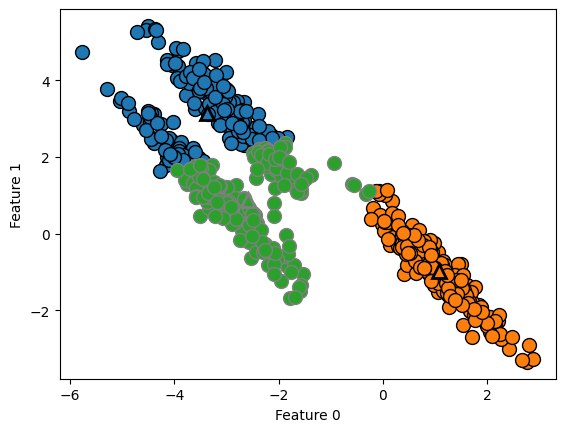

In [130]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
  kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
  markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 1')

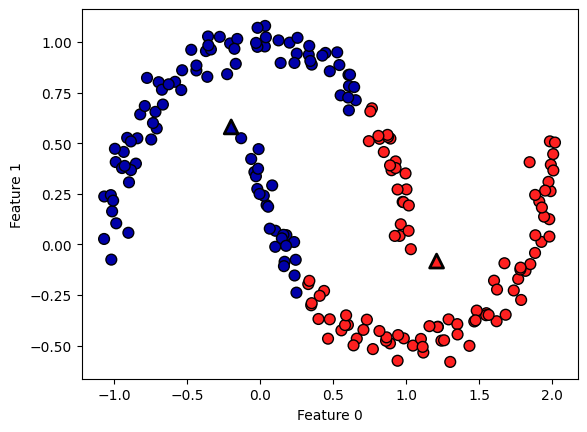

In [131]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

このように、k-meansはクラスタが丸くない場合や複雑な形状の場合にはうまく機能しない

## 教師なし学習の難しさ
教師なし学習の難しさは、アルゴリズムが学習したことの有用性の評価にある\
教師なし学習で与えるデータはラベルが分かっていないデータであるため、出力が正解かどうかを判断することができず、結果が人間が求めているものとなっているかを人間が確かめるしかない

参考として、次のある学生のスライドを紹介しておく

[スライドはこちら](https://www.slideshare.net/ngkry/ss-51045351)

なお、論文になっている

[論文はこちら](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj8u4PM78PsAhUGM94KHT1IDfIQFjAAegQIBxAC&url=https%3A%2F%2Fipsj.ixsq.nii.ac.jp%2Fej%2Findex.php%3Faction%3Dpages_view_main%26active_action%3Drepository_action_common_download%26item_id%3D176518%26item_no%3D1%26attribute_id%3D1%26file_no%3D1%26page_id%3D13%26block_id%3D8&usg=AOvVaw3iiWXIfl2c_uSq3zhFjb99)

# Scikit-learnが提供するモデルについて

チートシートで示したように多くのモデルが実装されている

ここでは、そのなかから、今後も利用する価値が高い、学んでおくことで今後の理解が進むと思われる内容のみ扱った

その他のモデルについては、( https://qiita.com/sugulu_Ogawa_ISID/items/e3fc39f2e552f2355209 )が詳しい
- 書籍「AIエンジニアを目指す人のための機械学習入門 実装しながらアルゴリズムの流れを学ぶ」として出版されている
- なお、現状において重要かというとそういうわけでもなく、特に当該分野の研究者を目指す場合やAIの歴史を学ぶ場合ではない限り、本内容で十分であろう

# 課題(データの分類)
いつもの通りの提出方法でお願いします

**[課題]**
- 上記のcancerおよびtwo_moonデータセットについて、ランダムフォレストおよび、既に扱ったLightGBMそれぞれについて分類し、評価しなさい
- 比較は、cancer、two_moonデータセット100個、two_moonデータセット300個の3種類、それぞれランダムフォレスト、Light_GBMを用いるため、全部で6個の結果を用いて評価する
- その上で、どちらが優れているかを比較しなさい

なお、解答にあたっては次の点に注意しなさい
- 単純な比較が行われ、結果が妥当ではない場合でも特に問題はない
- 本来は、例えば交差検証を行う、何度か試みて平均をとるなどしなければ、論文やきちんとした評価などでは通用しないが、ここでは厳密さは問わない
- コードと結果を示し、最後に、それらを纏めて、単純にランダムフォレストとLightGBMのどちらが優れていると考えられるかだけ記述しなさい

上記で解答が困難な場合は、以下にcancerのランダムフォレストとLightGBMの参考コードを記載する
- このコードはそのまま課題の解答の一部として用いてよい
- このコードを書き替えて、two_moonの100および300について分類し、その精度を求めれば課題は成立する

- わからない！という場合の多くは各関数の意味が理解できていないのが原因と思われるので、まずはググること
- mglernのコードは課題では求めておらず不要である
  - 下記余裕がある場合を参照
- テンプレがあれば1から素で書けるようになること
  - これからの課題や試験が太刀打ちできなくなります
  - コードを見てわかる通り、実質データを準備するのに2行、モデルの準備に1行、モデルの構築(学習)に1行、推定に1行、アキュラシーを求めるのに1行ですので、ここで根をあげないように
    - 高々6行でできるところに注目し、6行に振り回されないように
    - PyTorchはそうはいきませんので

**(余裕がある場合)**

- 余裕がある人は、答えを使った混同行列やF値、MCCといった評価が行えるので試してみると良い
- 敢えてmglernのコードを追加しているのは、なぜ〇〇が〇〇でよくないのか？を知るためである
  - 是非その理由を考察してみると良い
  - mglernを用いればすべてがわかるというわけではない。他のツールを屈指して、本質に迫ると良いであろう
  - Kagglerでも大人気、最強といわれるLightGBMだけに頼ることができないことがよくわかるであろう
- LightGBMは、先に示した例が回帰であったように、回帰にも2値・多値分類にも使える万能選手である
  - LightGBMのマニュアルにある、objectiveを調べると良い
- さらに余裕のある人は、LightGBMのランダムフォレストモードを利用してみると良いだろう
  - ランダムフォレストと結果は同じになるだろうか？

In [132]:
!pip install mglearn

## ランダムフォレスト cancer

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
forestc = RandomForestClassifier(n_estimators=6, random_state=2)
forestc.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forestc.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forestc.score(X_test, y_test)))
x_pred = forestc.predict(X_test) # forestc.score(X_test, y_test)としても一緒、書き下すとこういう意味、答えも一緒
acc_rf_c = (y_test==x_pred).sum()/len(y_test)
acc_rf_c

Accuracy on training set: 1.000
Accuracy on test set: 0.972


0.972027972027972

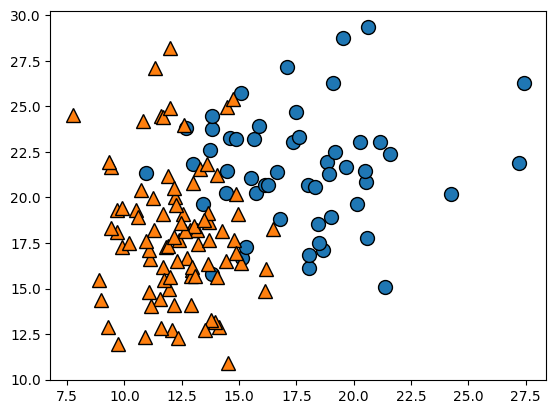

In [134]:
import mglearn
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

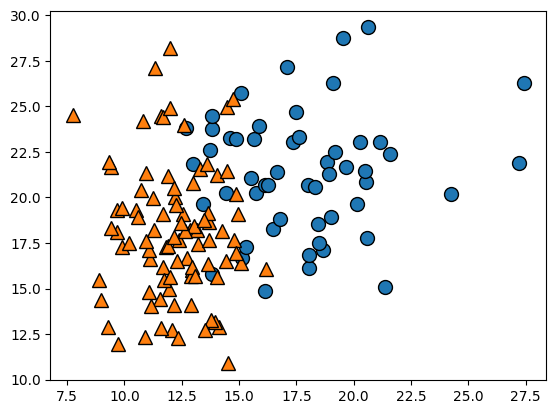

In [135]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], x_pred)

## LightGBM cancer

以下を実行すると、おそらく、「No further splits with positive gain, best gain: -inf」とwarningが表示されるであろう
 - LightGBMが内部で決定木を成長させてる際、pre-pruning（特徴空間をそれ以上分割しても情報利得が得られず分割を停止する機能）が働いたことを示す
 - 決定木の成長アルゴリズムとして次の2つがあり、一般的にdepth-firstが利用されるのに対してLightGBMはbest-firstを利用する
  - depth-first (level-wise) ：順番固定で通常左から右の順で伸ばす
  - best-first (leaf-wise) ：分岐することでより不純度・予測誤差を下げることがえきる枝から伸ばす
 - なお、完全に成長させれば差はなく同じ木構造になる

 - 決定木の剪定アルゴリズム、つまり木を無駄に成長させないようにする手法には次の2種類がある
  - pre-pruning：追加で分岐して予測誤差を下げられる時だけ分岐、最適な木を発見できない可能性があるが、post-pruningよりも計算コストが小さい(LightGBMで利用)
  - post-pruning：まず決定木を完全に成長させた後に最も予測誤差を下げる木のサイズを選択

- つまり、最良の分岐を探索する際に、分岐による情報利得が得られない（それ以上分割しても得をしない）ところまできた、ということを意味する


In [136]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)
params={
  'objective': 'binary',
  'random_state': 42,
  'metric': 'binary_logloss'
}
bstc = lgb.train(params, dtrain, num_boost_round=1000,valid_sets=[dtrain, dtest])
print("Best Score:", bstc.best_score["valid_1"]['binary_logloss'])
x_pred = (bstc.predict(X_test)>0.5)
acc_lg_c = (y_test==x_pred).sum()/len(y_test) # こちらは、scoreメソッドが存在しない
acc_lg_c

[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

0.965034965034965

### Accuracyの演算について

ランダムフォレストは、scoreを用いることができた
```
forestc.score(X_test, y_test)
```
LightGBMには、scoreがない、そこで同じ意味で次のように記述した

```
(y_test==x_pred).sum()/len(y_test)
```
もう一つ、次の記述の方法も取得済みである
- 実行してみよう
- すべて同じ値を出力するので、ランダムフォレストの例で試してみると良いであろう

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, x_pred)

0.965034965034965

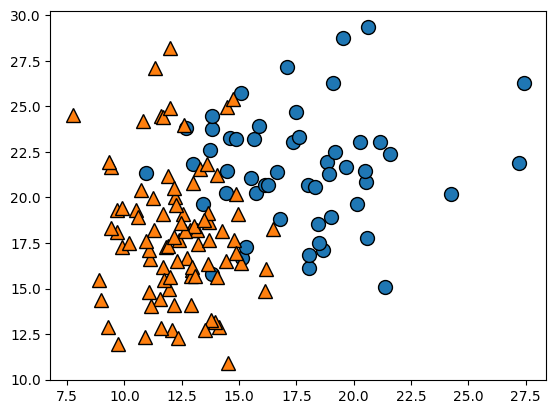

In [138]:
import mglearn
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

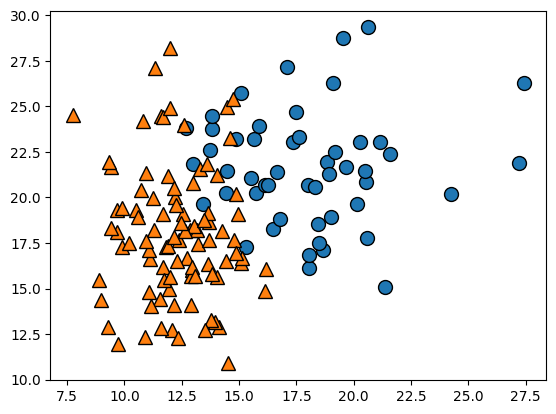

In [139]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], x_pred)

## 比較のまとめ

In [140]:
print("ランダムフォレスト cancer:", acc_rf_c)
print("LightGBM cancer:", acc_lg_c)

ランダムフォレスト cancer: 0.972027972027972
LightGBM cancer: 0.965034965034965


他の比較も同様に加えること